#Importing data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving food-consumption.csv to food-consumption.csv


#Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Reading the data and exploring the data

In [3]:
df=pd.read_csv("food-consumption.csv")
print("Columns:\n",df.columns)

Columns:
 Index(['Country', 'Real coffee', 'Instant coffee', 'Tea', 'Sweetener',
       'Biscuits', 'Powder soup', 'Tin soup', 'Potatoes', 'Frozen fish',
       'Frozen veggies', 'Apples', 'Oranges', 'Tinned fruit', 'Jam', 'Garlic',
       'Butter', 'Margarine', 'Olive oil', 'Yoghurt', 'Crisp bread'],
      dtype='object')


In [4]:
df.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5


In [5]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Real coffee       76.307692
Instant coffee    43.307692
Tea               79.923077
Sweetener         16.846154
Biscuits          60.307692
Powder soup       51.615385
Tin soup          18.307692
Potatoes          11.000000
Frozen fish       19.615385
Frozen veggies    14.615385
Apples            69.538462
Oranges           70.461538
Tinned fruit      43.538462
Jam               56.384615
Garlic            43.615385
Butter            77.307692
Margarine         71.461538
Olive oil         54.692308
Yoghurt           22.307692
Crisp bread       21.076923
dtype: float64

In [6]:
data=df.drop( "Country", axis=1)  #Dropping the target variable for building covariance matrix
data=data.dropna() #Dropping the null values

# 3. Eignevalue and Eigen Vector

## 3.1 Normalizing the data using standard scalar 

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(data)
X_scaled[0]

array([ 0.5826709 ,  0.25673405,  0.49892637,  0.20229397, -0.16085813,
       -0.0410251 ,  0.03473997,  1.44569435,  0.62461571,  0.59615116,
        0.64703155,  0.31649154,  0.01932229,  0.64771389, -0.65284608,
        0.69479321,  0.53205481,  0.70687681,  0.40721798,  0.32263212])

In [8]:
X_scaled[0]

array([ 0.5826709 ,  0.25673405,  0.49892637,  0.20229397, -0.16085813,
       -0.0410251 ,  0.03473997,  1.44569435,  0.62461571,  0.59615116,
        0.64703155,  0.31649154,  0.01932229,  0.64771389, -0.65284608,
        0.69479321,  0.53205481,  0.70687681,  0.40721798,  0.32263212])

In [9]:
normalized_coffee=[]
real_coffee=np.array(data["Real coffee"])
for i in range(13):
  normalized_coffee.append(X_scaled[i][0])


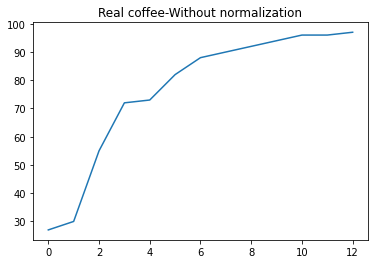

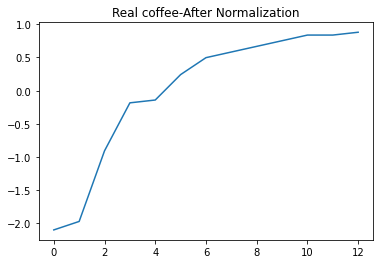

In [10]:
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.title("Real coffee-Without normalization")
plt.plot(np.sort(real_coffee))
plt.show()
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.title("Real coffee-After Normalization")
plt.plot(np.sort(normalized_coffee))
plt.show()

# 3.2 Covariance matrix of Feature vector

In [11]:
features=X_scaled.T
covariance_matrix=np.cov(features)
print("Shape of covariance Matrix-",np.shape(covariance_matrix))

Shape of covariance Matrix- (20, 20)


In [12]:
#Checking whether the covariance is Symmteric
print("The Covariance matrix is Symmetric-",np.all(np.abs(covariance_matrix-covariance_matrix.T))<1e-8)

The Covariance matrix is Symmetric- True


#**Best Corelation**

In [13]:
#Best corelation - found Switzerland and Austria
from operator import mod
x=np.max(covariance_matrix)
max=0
index1=0
index2=0
for i in range(len(covariance_matrix[1])):
  for j in range(len(covariance_matrix[1])):
    if(i==j):
      continue
    if abs(covariance_matrix[i][j])>abs(max):
      max=abs(covariance_matrix[i][j])
      index1=i
      index2=j

In [14]:
print("Best Corelation found between-",data.columns[index1],",",data.columns[index2])
print("Corr=",np.round(max,3))

Best Corelation found between- Frozen fish , Frozen veggies
Corr= 0.954


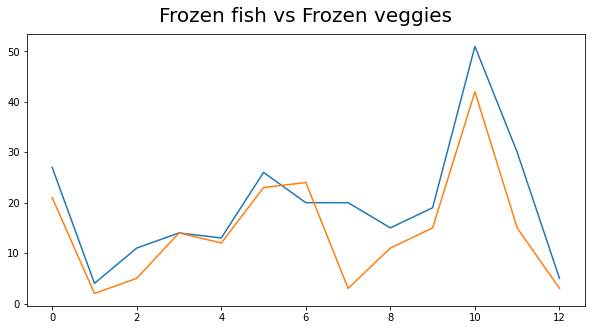

In [15]:
plt.figure(figsize=(10,5))
plt.plot(data["Frozen fish"])
plt.plot(data["Frozen veggies"])
plt.title("Frozen fish vs Frozen veggies",fontsize=20,pad=12)
plt.show()

# 3.3 Eigendecomposition
1) Calculating the eigenvalue and eigenvector of the covariance matrix

2) All the eigenvectors will be orthogonal as the matrix is symmetric

In [16]:
eig_vals, eig_vecs = np.linalg.eig(np.round(covariance_matrix,3))
print("Number of eigenvectors",len(eig_vals))

Number of eigenvectors 20


**Orthogonality**

1) Checking the orthogonality of the eigenvectors

2) Taking the dot product of the eigenvector which needs to be zero if vectors are orthogonal



In [17]:
for i in range(len(eig_vecs)):
  for j in range(len(eig_vecs)):
    if i==j:
      continue
    print(np.dot(eig_vecs[i],eig_vecs[j])<1e-4)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


**Variation Captured by each component**

In [18]:
# Making a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
7.275876460883155
3.6202098366599964
3.2350064278831794
1.8570542464980786
1.4337301016749056
1.2253245564130886
1.084013649382649
0.8242640832694063
0.5213923250819272
0.32008035018463393
0.236328038491316
0.02756643554022685
0.001799706463193999
0.0011777963035461052
0.000815906860536039
0.0006196456374485875
0.00042112423504883374
0.0003472533892110824
0.0001735422013739443
0.00012801193537637982


In [19]:
tot = sum(eig_vals)
var_exp = [np.round((i / tot)*100,5) for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(185 * '-')
print ("\nCumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [33.5913, 16.7138, 14.93539, 8.57366, 6.61925, 5.65708, 5.00468, 3.80547, 2.40717, 1.47775, 1.09108, 0.12727, -0.00831, 0.00544, -0.00377, -0.00194, -0.00059, 0.00286, 0.0008, 0.0016]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Cumulative variance captured as we travel each component 
 [ 33.5913   50.3051   65.24049  73.81415  80.4334   86.09048  91.09516
  94.90063  97.3078   98.78555  99.87663 100.0039   99.99559 100.00103
  99.99726  99.99532  99.99473  99.99759  99.99839  99.99999]


**Visualizing the variation captured with number of principal components**

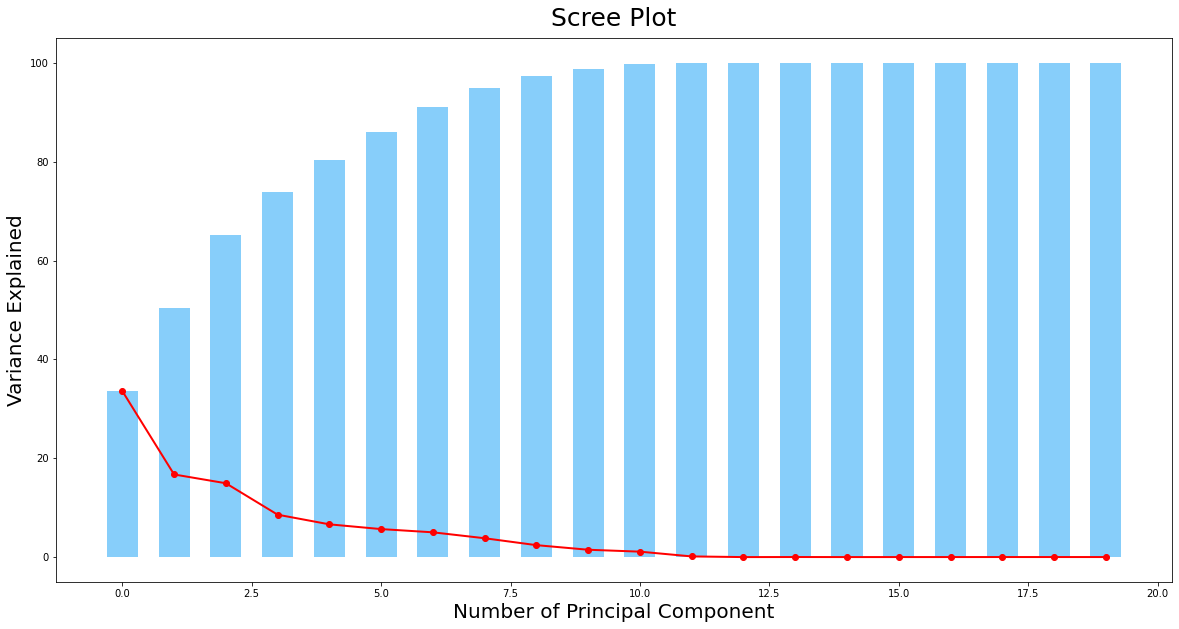

In [20]:
plt.figure(figsize=(20,10))
PC_values = np.arange(len(eig_vecs))
plt.plot(PC_values, var_exp, 'o-', linewidth=2, color='red')
plt.title('Scree Plot',fontsize=25,pad=12)
plt.xlabel('Number of Principal Component',fontsize=20)
plt.ylabel('Variance Explained',fontsize=20)
plt.bar( PC_values, cum_var_exp, width=0.6, color="lightskyblue")
plt.show()

# **Finding optimal PC**

In [21]:
!pip install Kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,len(var_exp)+1), 
        y=var_exp, 
        S=0.4, curve="convex", direction="decreasing", online=True)

In [23]:
print("Number of PC to select=",cost_knee_c3.elbow)
print("Capturing the data variation by",np.round(cum_var_exp[cost_knee_c3.elbow-1],2),"%")

Number of PC to select= 5
Capturing the data variation by 80.43 %


#**Projection on first two principal component**

In [24]:
pc1_pc2_matrix = np.hstack((eig_pairs[0][1].reshape(20,1), eig_pairs[1][1].reshape(20,1)))
projection = X_scaled.dot(pc1_pc2_matrix)

In [25]:
pc1_projection=[projection[i][0] for i in range(len(projection))]
pc2_projection=[projection[i][1] for i in range(len(projection))]

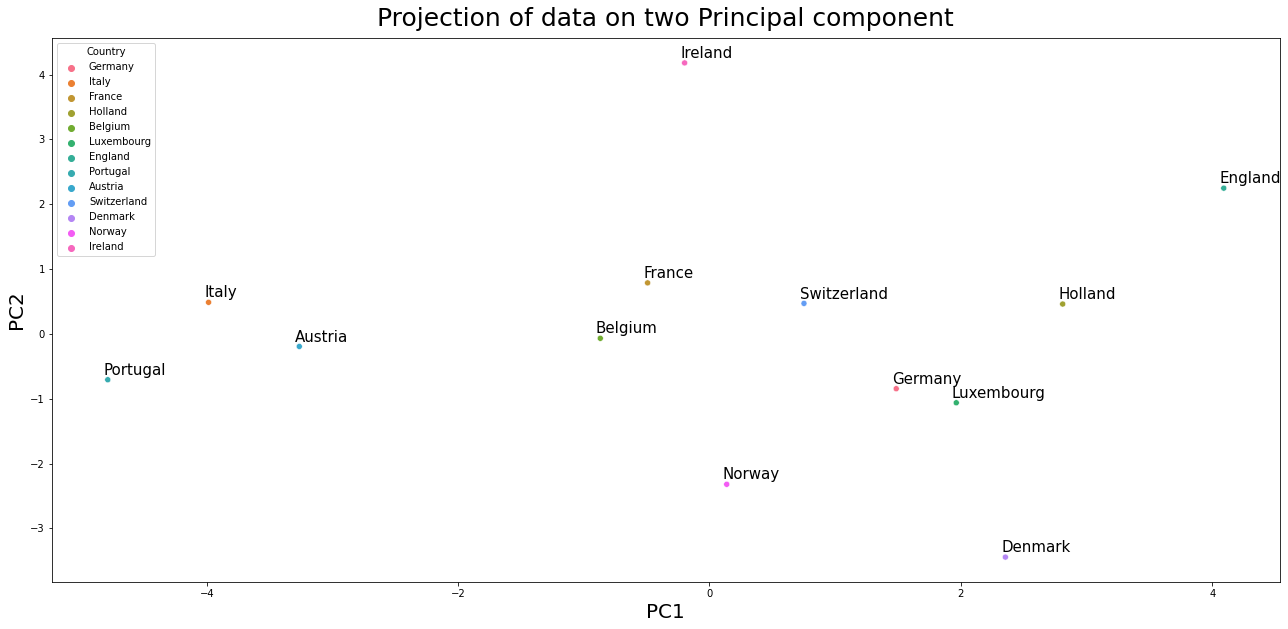

In [26]:
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(22,10))
plt.xlabel("PC1",fontsize=20)
plt.ylabel("PC2",fontsize=20)

plt.title("Projection of data on two Principal component",fontsize=25,pad=12)
sns.scatterplot(pc1_projection,pc2_projection,hue=df["Country"])
for i in range(len(pc1_projection)):
  plt.text(pc1_projection[i]-0.035,pc2_projection[i]+0.075,df["Country"][i],fontsize=15)  



#**Inference**

In [27]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((np.array(point) - np.array(data))**2, axis=0))
    
distance=[]
for x in projection:
  for y in projection:
    distance.append(euclidean(x,y))

index=[]
sorted_distance=np.sort(distance)
for i in range(len(distance)):
  index.append(distance.index(sorted_distance[i]))
sorted=np.array(index)

unique_order=[]
for i in range(len(sorted)-1):
  if(sorted[i]==sorted[i+1]):
    continue
  unique_order.append(sorted[i])

closest=[]
print("Top 10 closest points\n")
for i in range(1,11):
  a= int(unique_order[i]/13)
  b=unique_order[i]%13
  print(df["Country"][a],"-",df["Country"][b])  
  closest.append([df["Country"][a],df["Country"][b]])

Top 10 closest points

Germany - Luxembourg
France - Belgium
Italy - Austria
France - Switzerland
Italy - Portugal
Germany - Switzerland
Portugal - Austria
Belgium - Switzerland
Holland - Luxembourg
Germany - Holland


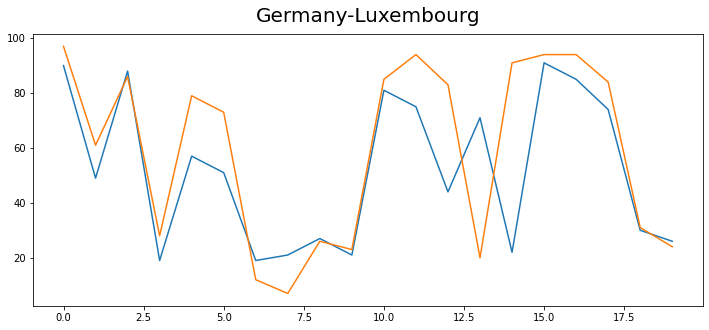

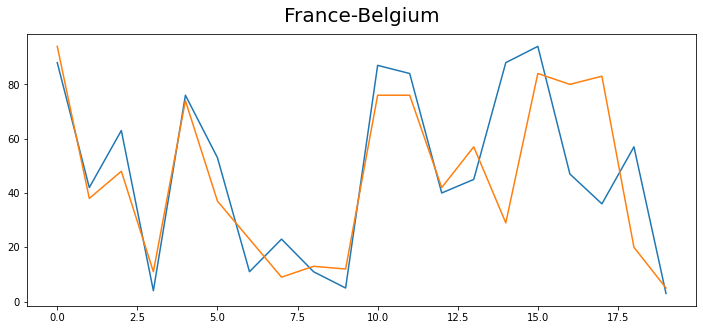

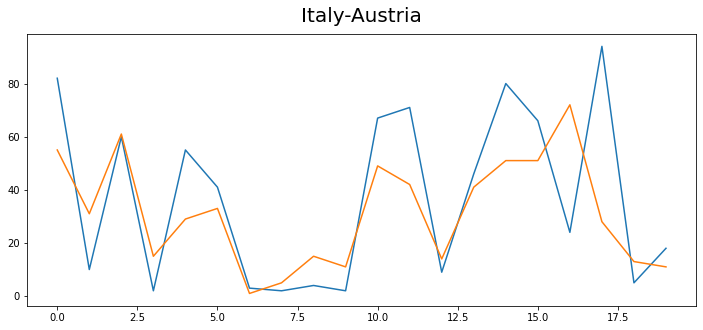

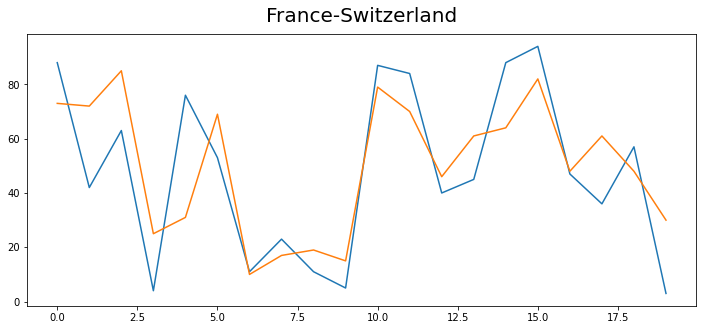

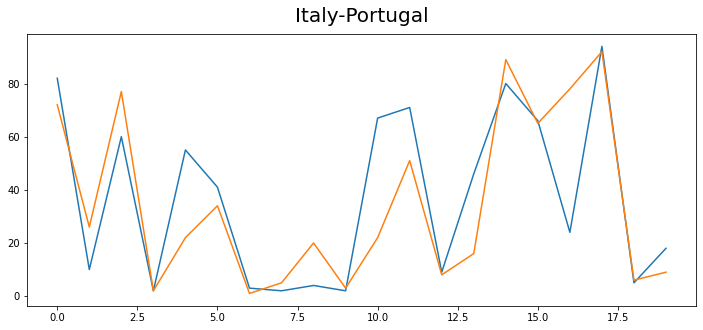

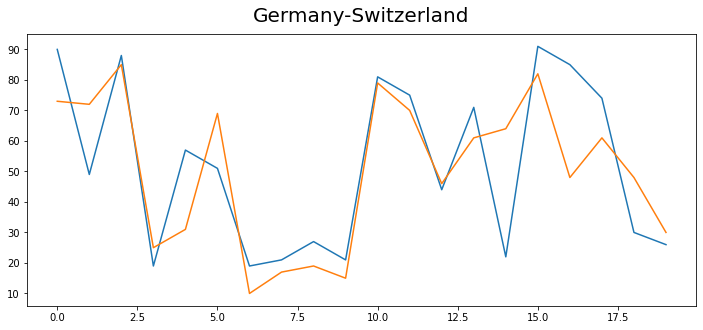

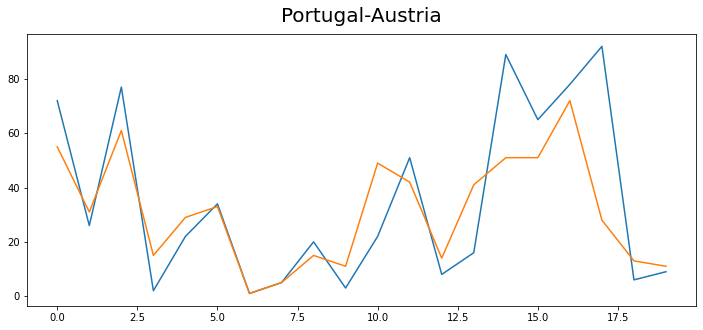

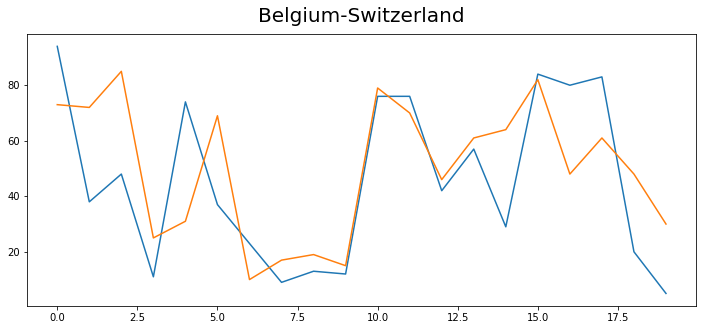

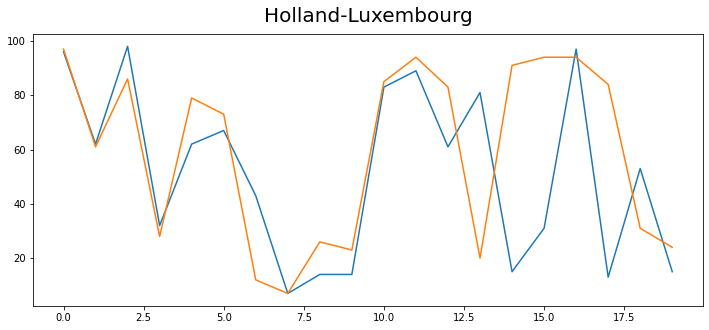

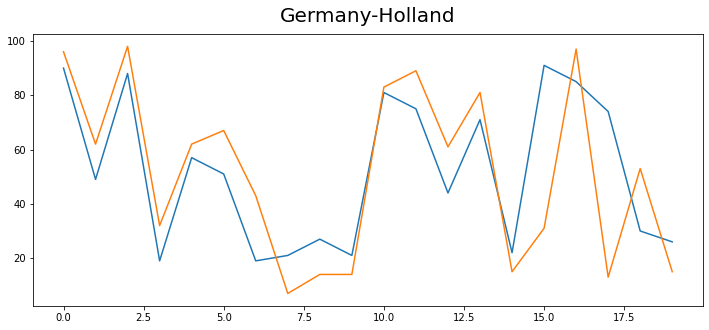

In [28]:
from numpy.core.multiarray import concatenate
for country in closest:
  plt.figure(figsize=(12,5))
  title=country[0]+"-"+country[1]
  plt.title(title,fontsize=20,pad=12)
  plt.plot(df.loc[df["Country"]==country[0]].drop("Country",axis=1).values[0])
  plt.plot(df.loc[df["Country"]==country[1]].drop("Country",axis=1).values[0])
  

**Plotting Principal component**

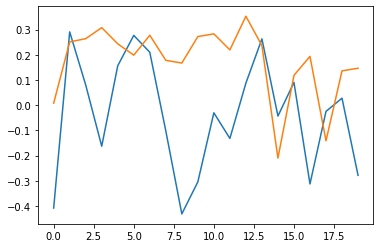

In [29]:
plt.plot(eig_pairs[1][1])
plt.plot(eig_pairs[0][1])
plt.show()

#Projection of data on both PC1, PC2

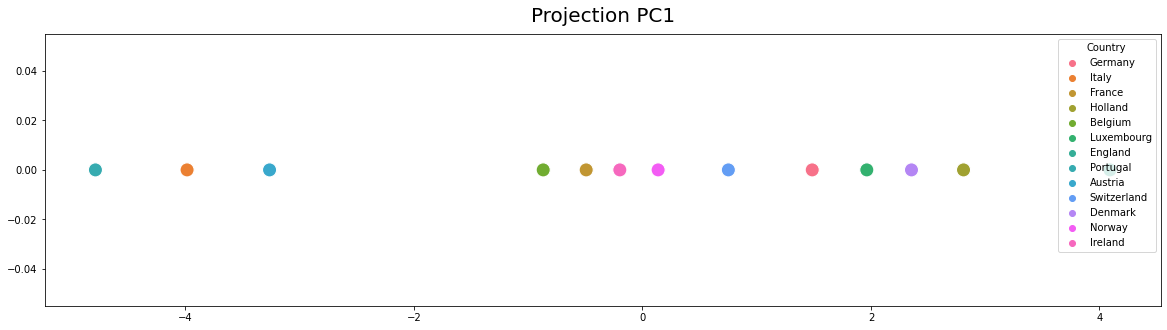

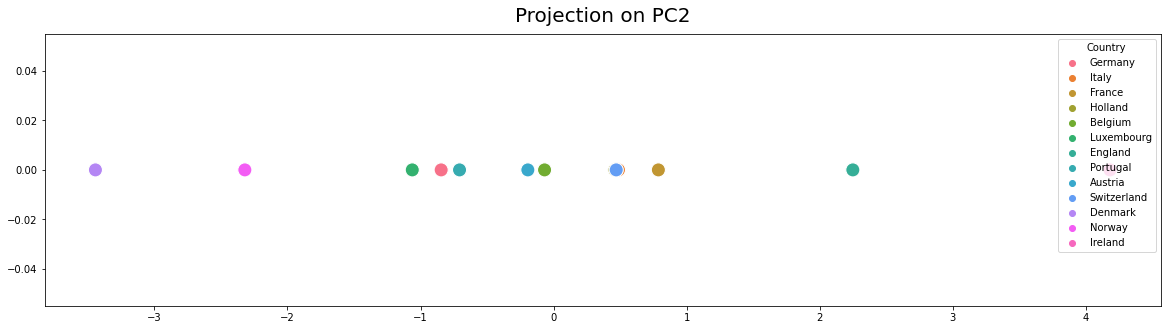

In [30]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(20, 5))
plt.title("Projection PC1",fontsize=20,pad=12)
sns.scatterplot(pc1_projection, [0] * len(pc1_projection), hue=df["Country"], s=200)
plt.show()
plt.figure(figsize=(20, 5))
plt.title("Projection on PC2",fontsize=20,pad=12)
sns.scatterplot(pc2_projection, [0] * len(pc2_projection), hue=df["Country"], s=200)
plt.show()